# FIRST COMPUTER VISION'S ALGORYTHMES

## 1 - Import Libraries

In [2]:
import os
import kaggle
import random
import zipfile

# Import scientific's libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Machine Learning's libraries
import sklearn as sk
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Print ML's libraries version from Google Colab
print("TENSORFLOW VERSION\n", tf.__version__)
print("KERAS VERSION\n", keras.__version__)
print("NUMPY VERSION\n", np.__version__)
print("PANDAS VERSION\n", pd.__version__)

TENSORFLOW VERSION
 2.0.0
KERAS VERSION
 2.2.4-tf
NUMPY VERSION
 1.17.4
PANDAS VERSION
 1.0.5


In [3]:
# Check if there is a GC compatible with Tensorflow
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce GTX 970, pci bus id: 0000:01:00.0, compute capability: 5.2



## 2 - Import Datasets

In [4]:
# Set a path to directories
ABSOLUTE_PATH = os.getcwd() + "\\"
RAW_DATA = ABSOLUTE_PATH + "datasets\\"
DATA_DIR = RAW_DATA + "dogs_vs_cats\\"
MODELS_DIR = ABSOLUTE_PATH + "save_models\\"
DATA_TRAIN = DATA_DIR + "train\\"
DATA_TEST = DATA_DIR + "test\\"

In [3]:
print("\n(+) Creating data architecture...")
try:
    os.mkdir(RAW_DATA)
    os.mkdir(DATA_DIR)
    os.mkdir(MODELS_DIR)
    print(" > DONE")
except:
    pass


(+) Creating data architecture...
 > DONE


In [4]:
# API Command available on kaggle's dataset (here is an example below)
print("\n(+) DOWNLOADING KAGGLE'S DATASET...")
os.system("kaggle competitions download -c dogs-vs-cats")

print(" > DONE")


(+) DOWNLOADING KAGGLE'S DATASET...
 > DONE


In [5]:
# Extract files from archives train.zip
print("\n(+) UNZIP \"dogs_vs_cats.zip\" > PROCESSING...")
with zipfile.ZipFile(ABSOLUTE_PATH + "dogs-vs-cats.zip", 'r') as zip_ref:
    zip_ref.extractall(DATA_DIR)

print(" > DONE")


(+) UNZIP "dogs_vs_cats.zip" > PROCESSING...
 > DONE


In [6]:
# Extract files from archives test.zip
print("\n(+) UNZIP \"train.zip\" > PROCESSING...")
with zipfile.ZipFile(DATA_DIR + "train.zip", 'r') as zip_ref:
    zip_ref.extractall(DATA_DIR)

print(" > DONE")


(+) UNZIP "train.zip" > PROCESSING...
 > DONE


In [7]:
# Extract files from archives test.zip
print("\n(+) UNZIP \"test1.zip\" > PROCESSING...")
with zipfile.ZipFile(DATA_DIR + "test1.zip", 'r') as zip_ref:
    zip_ref.extractall(DATA_DIR)

print(" > DONE")


(+) UNZIP "test1.zip" > PROCESSING...
 > DONE


In [8]:
# Rename testset folder
try:
    os.rename(DATA_DIR + "test1", DATA_DIR + "test")
except:
    pass

In [9]:
# Remove useless files
try:
    os.remove(ABSOLUTE_PATH + "dogs-vs-cats.zip")
    os.remove(DATA_DIR + "train.zip")
    os.remove(DATA_DIR + "test1.zip")
    os.remove(DATA_DIR + "sampleSubmission.csv")

    print("\n(-) REMOVE \"dogs-vs-cats.zip\" !")
    print("\n(-) REMOVE \"train.zip\" !")
    print("\n(-) REMOVE \"test1.zip\" !")
    print("\n(-) REMOVE \"sampleSubmission.csv\" !")
except:
    pass


(-) REMOVE "dogs-vs-cats.zip" !

(-) REMOVE "train.zip" !

(-) REMOVE "test1.zip" !

(-) REMOVE "sampleSubmission.csv" !


In [99]:
print(os.listdir(DATA_DIR))

['test', 'train']


In [5]:
print("Number of images in Train set: ", len(os.listdir(DATA_TRAIN)))
print("Number of images in Test set:  ", len(os.listdir(DATA_TEST)))

Number of images in Train set:  25000
Number of images in Test set:   12500


## 3 - Create a labelized dataframe from raw train set

We convert 1 to dog and 0 to cat, because we use image generator. We need to convert category colum in string, becauce, the image generator will convert it with one-hot encoding. This is better for "classification". 

In [6]:
files = os.listdir(DATA_TRAIN)
categories = []

cat = 0
dog = 0

for file in files:
    category = file.split(".")[0]
    if category == "cat":
        categories.append("cat")
        cat+=1
    else:
        categories.append("dog")
        dog+=1

df_train = pd.DataFrame({'file': files,
                         'category': categories})

print(" Number of cats:", cat, "\n", "Number of dogs:", dog)

 Number of cats: 12500 
 Number of dogs: 12500


In [7]:
# Here is a example of the head and the tail of our dataframe from training set
df_train

,filename,category
0,cat.0.jpg,cat
1,cat.1.jpg,cat
2,cat.10.jpg,cat
3,cat.100.jpg,cat
4,cat.1000.jpg,cat
...,...,...
24995,dog.9995.jpg,dog
24996,dog.9996.jpg,dog
24997,dog.9997.jpg,dog
24998,dog.9998.jpg,dog


In [8]:
# We will now split our training set in training set (80%) & validation set (20%)
df_train, df_val = train_test_split(df_train, test_size=0.20, random_state=42)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

total_train = df_train.shape[0]
total_val = df_val.shape[0]

print("df_train_shape:", total_train)
print("df_val_shape:", total_val)

df_train_shape: 20000
df_val_shape: 5000


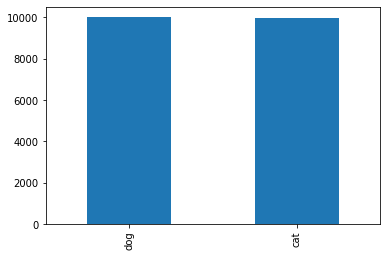

In [9]:
# Display classes repartition in train dataframe
df_train["category"].value_counts().plot.bar()

In [10]:
count_cat_train = 0
count_dog_train = 0

for category in df_train["category"]:
    if category == "cat":
        count_cat_train+=1
    else:
        count_dog_train+=1

print("count_cat_train:", count_cat_train)
print("count_dog_train:", count_dog_train)

count_cat_train: 9985
count_dog_train: 10015


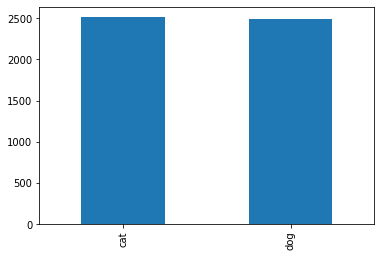

In [11]:
# Display classes repartition in validation dataframe
df_val["category"].value_counts().plot.bar()

In [12]:
count_cat_val = 0
count_dog_val = 0

for category in df_val["category"]:
    if category == "cat":
        count_cat_val+=1
    else:
        count_dog_val+=1

print("count_cat_val:", count_cat_val)
print("count_dog_val:", count_dog_val)

count_cat_val: 2515
count_dog_val: 2485


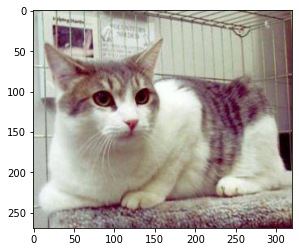

In [13]:
example = random.choice(files)
image = load_img(DATA_TRAIN + example)
plt.imshow(image)

## 4 - Build first Convolution Neural Network (CNN) => Classification

In [34]:
# Set Hyperparameters
IMAGE_CHANNELS = 3
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
ACTIVATION_CONV = "relu"
ACTIVATION_OUTPUT = "softmax"
OPTIMIZER = "rmsprop"
LOSS = "categorical_crossentropy"
BATCH_SIZE = 15
EPOCHS = 50

In [15]:
# Build model's architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), activation=ACTIVATION_CONV, input_shape=(IMAGE_WIDTH, 
                                                                      IMAGE_HEIGHT, 
                                                                      IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation=ACTIVATION_CONV))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation=ACTIVATION_CONV))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation=ACTIVATION_CONV))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation=ACTIVATION_OUTPUT)) # 2 because we have 2 classes (cat & dog)

model.compile(loss=LOSS,
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

In [16]:
# Set parameters for Callbacks
# If accuracy doesn't increase for 10 epochs, training is stopped => Prevent overfitting!
earlystop = EarlyStopping(patience=10)

# If accuracy doesn't increase for 2 epochs => Learning rate is reduced at a minimum of 0.00001
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

CALLBACKS = [earlystop, learning_rate_reduction]

## 5 - Data Image Generator

In [17]:
# Hyperparameters for DataImageGenerators
CLASS_MODE = "categorical"

In [18]:
# Create datagenerator for training set with parameters for data augmentation
train_datagen = ImageDataGenerator(rotation_range=15,
                                   rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1)

gen_train = train_datagen.flow_from_dataframe(df_train,
                                              DATA_TRAIN,
                                              x_col='file',
                                              y_col='category',
                                              target_size=IMAGE_SIZE,
                                              class_mode=CLASS_MODE,
                                              batch_size=BATCH_SIZE)

Found 20000 validated image filenames belonging to 2 classes.


In [19]:
# Create datagenerator for validation set with parameters for data augmentation
validation_datagen = ImageDataGenerator(rescale=1./255)

gen_val = validation_datagen.flow_from_dataframe(df_val,
                                                 DATA_TRAIN,
                                                 x_col='file',
                                                 y_col='category',
                                                 target_size=IMAGE_SIZE,
                                                 class_mode=CLASS_MODE,
                                                 batch_size=BATCH_SIZE)

Found 5000 validated image filenames belonging to 2 classes.


## 6 - Train CNN

In [20]:
# We will now train the model
history = model.fit_generator(gen_train, 
                              epochs=EPOCHS,
                              validation_data=gen_val,
                              validation_steps=total_val // BATCH_SIZE,
                              steps_per_epoch=total_train // BATCH_SIZE,
                              callbacks=CALLBACKS)

Epoch 1/50
1333/1333 [==============================] - 126s 94ms/step - loss: 0.7426 - accuracy: 0.6406 - val_loss: 0.5586 - val_accuracy: 0.7137
Epoch 2/50
1333/1333 [==============================] - 122s 92ms/step - loss: 0.5585 - accuracy: 0.7198 - val_loss: 0.6903 - val_accuracy: 0.6663
Epoch 3/50
1333/1333 [==============================] - 122s 92ms/step - loss: 0.5015 - accuracy: 0.7618 - val_loss: 0.5827 - val_accuracy: 0.7650
Epoch 4/50
1333/1333 [==============================] - 121s 91ms/step - loss: 0.4690 - accuracy: 0.7823 - val_loss: 0.4914 - val_accuracy: 0.7660
Epoch 5/50
1333/1333 [==============================] - 120s 90ms/step - loss: 0.4424 - accuracy: 0.7977 - val_loss: 0.5830 - val_accuracy: 0.7742
Epoch 6/50
1333/1333 [==============================] - 120s 90ms/step - loss: 0.4276 - accuracy: 0.8045 - val_loss: 0.4147 - val_accuracy: 0.8232
Epoch 7/50
1333/1333 [==============================] - 121s 91ms/step - loss: 0.4024 - accuracy: 0.8237 - val_loss: 0

## 7 - Save Model

In [21]:
model.save_weights(MODELS_DIR + "model_cnn_dogs-vs-cats_01-01-2021-00h-00m-00s.h5")

## 8 - Display Accuracy & Loss

In [22]:
history.history

{'loss': [0.7428094701958442,
  0.5586022016053382,
  0.5013860232209097,
  0.46857111751175773,
  0.4422879880492258,
  0.42753153540844585,
  0.402513046869866,
  0.39060639396537267,
  0.38248284217384954,
  0.34789285842727236,
  0.3301463633578122,
  0.3306112481089631,
  0.31961169006050844,
  0.31760865391094834,
  0.29974753401981524,
  0.2997436344191108,
  0.29268366782321376,
  0.29247796406779764,
  0.28518257415481796,
  0.2872020353726001,
  0.2823706989372063,
  0.27250801770947175,
  0.2774444876188841,
  0.27312422214760496,
  0.27105626450468967,
  0.26600296953439057,
  0.25823094147405,
  0.2608333965863642,
  0.26058399572097973,
  0.26666270724707675,
  0.26299597696774685,
  0.2578020559902046,
  0.2632368104399548,
  0.2653244486559077,
  0.25547187723832665,
  0.2612857129257046,
  0.26185617179204174,
  0.2573307247891601,
  0.26249142157970323,
  0.25903461837508707,
  0.25948494254810184,
  0.2594709007909686,
  0.2592956785435099,
  0.2617148804476716,
  0.

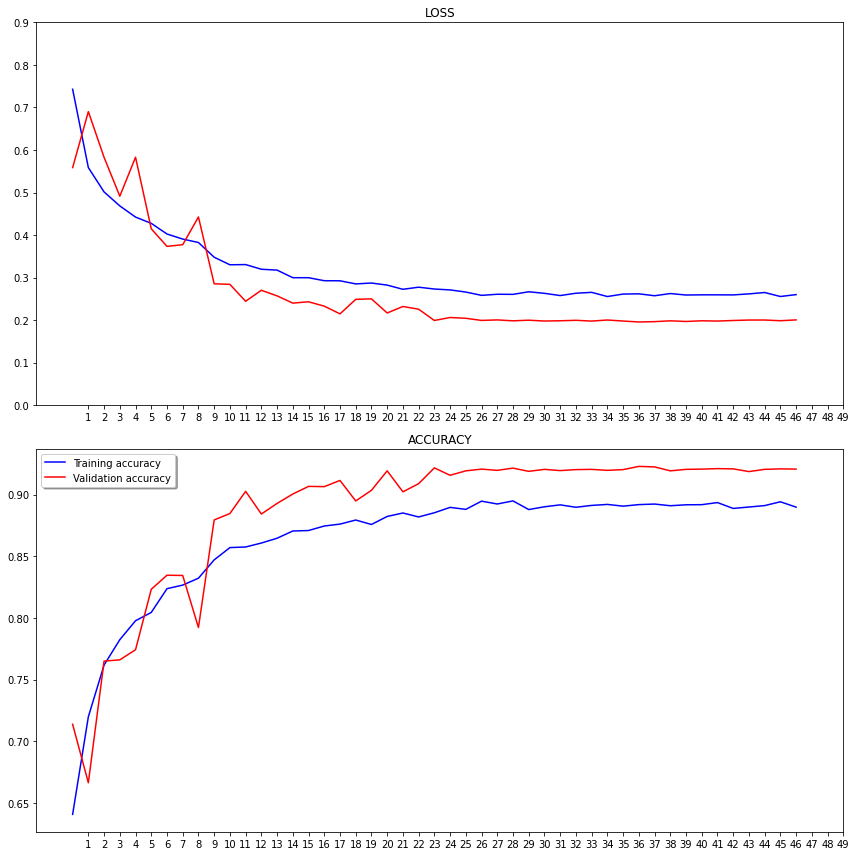

In [23]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, EPOCHS, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))
ax1.set_title('LOSS')

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, EPOCHS, 1))
ax2.set_title('ACCURACY')

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

## 9 - Test CNN model with new data

In [64]:
test_files = os.listdir(DATA_TEST)
df_test = pd.DataFrame({
    'file': test_files
})
total_test = df_test.shape[0]

print("Number of images in test set:", total_test)

Number of images in test set: 12500


In [65]:
df_test

,file
0,1.jpg
1,10.jpg
2,100.jpg
3,1000.jpg
4,10000.jpg
...,...
12495,9995.jpg
12496,9996.jpg
12497,9997.jpg
12498,9998.jpg


In [66]:
test_datagen = ImageDataGenerator(rescale=1./255)
gen_test = test_datagen.flow_from_dataframe(
    df_test, 
    DATA_TEST, 
    x_col='file',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 12500 validated image filenames.


In [67]:
predict = model.predict_generator(gen_test, steps=np.ceil(total_test / BATCH_SIZE))

We get the highest probability with numpy average max, because it is a categorical classification. Then the highest probability give us prediction. We add predictions to the test dataframe.

In [68]:
df_test['category'] = np.argmax(predict, axis=-1)

In [69]:
df_test

,file,category
0,1.jpg,1
1,10.jpg,0
2,100.jpg,0
3,1000.jpg,1
4,10000.jpg,1
...,...,...
12495,9995.jpg,0
12496,9996.jpg,1
12497,9997.jpg,1
12498,9998.jpg,0


We replace output prediction and repalce by category (0 => cat & 1 => dog)

In [70]:
df_test['category'] = df_test['category'].replace({0: 'cat', 1: 'dog'})

In [71]:
df_test

,file,category
0,1.jpg,dog
1,10.jpg,cat
2,100.jpg,cat
3,1000.jpg,dog
4,10000.jpg,dog
...,...,...
12495,9995.jpg,cat
12496,9996.jpg,dog
12497,9997.jpg,dog
12498,9998.jpg,cat


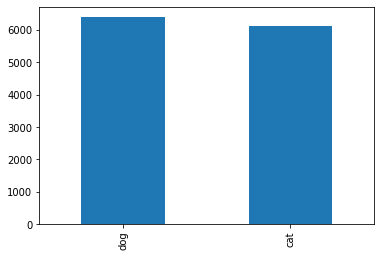

In [93]:
df_test['category'].value_counts().plot.bar()

In [94]:
nb_cat_test = 0
nb_dog_test = 0

for row in df_test["category"]:
    if row == "cat":
        nb_cat_test+=1
    else:
        nb_dog_test+=1
        
print("Number of cats in test set:", nb_cat_test)
print("Number of dogs in test set:", nb_dog_test)

Number of cats in test set: 6104
Number of dogs in test set: 6396


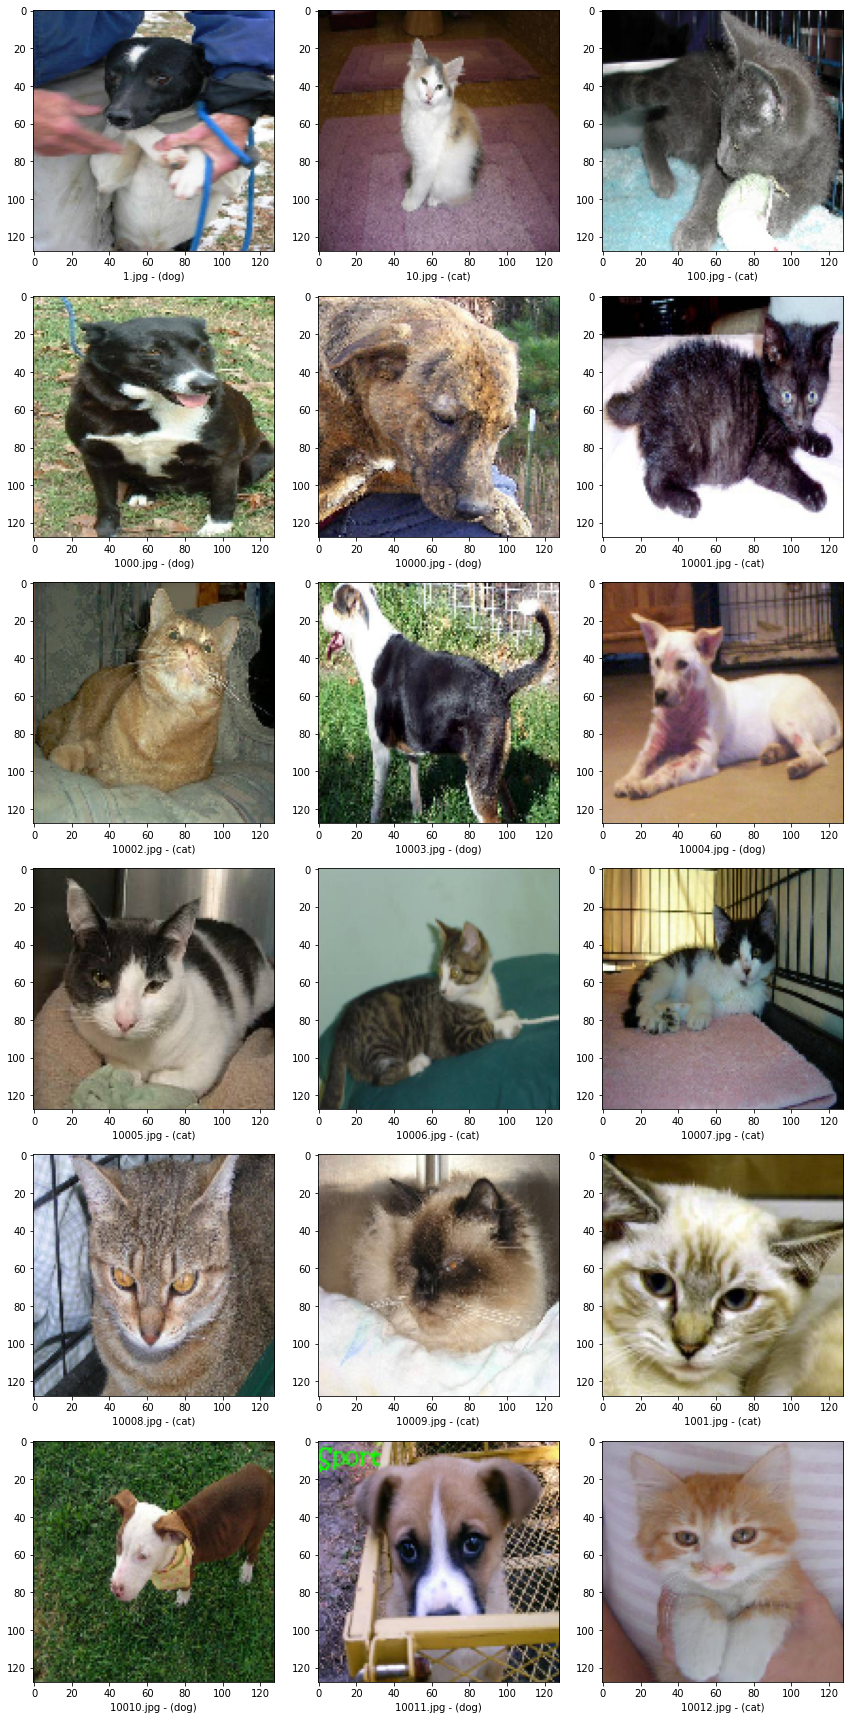

In [74]:
test_xpl = df_test.head(18)
test_xpl.head()
plt.figure(figsize=(12, 24))
for index, row in test_xpl.iterrows():
    file = row['file']
    category = row['category']
    img = load_img(DATA_TEST + file, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index + 1)
    plt.imshow(img)
    plt.xlabel(file + ' - (' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()